In [1]:
# Import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load and preview datasets
walmart = pd.read_csv('../dataset/Walmart.csv')
fedfunds = pd.read_csv('../dataset/FEDFUNDS.csv')
cci = pd.read_excel('../dataset/ConsumerConfidenceIndex.xls')

print(walmart.head())
print(fedfunds.head())
print(cci.head())

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  
  observation_date  FEDFUNDS
0       1954-07-01      0.80
1       1954-08-01      1.22
2       1954-09-01      1.07
3       1954-10-01      0.85
4       1954-11-01      0.83
      Month  Year   ICS  Cases
0  November  1952  86.2   1714
1  February  1953  90.7   3097
2    August  1953  80.8   1022
3  November  1953  80.7   1023
4  February  1954  82.0   30

In [3]:
# Walmart: ensure datetime format
walmart['Date'] = pd.to_datetime(walmart['Date'], format='%d-%m-%Y')

# FEDFUNDS: ensure datetime format
fedfunds['observation_date'] = pd.to_datetime(fedfunds['observation_date'], infer_datetime_format=True, errors='coerce')
fedfunds.rename(columns={'observation_date': 'Date', 'FEDFUNDS': 'FedFunds'}, inplace=True)

# ConsumerConfidenceIndex: Create a proper datetime column
cci['Date'] = pd.to_datetime(cci['Month'] + ' ' + cci['Year'].astype(str), format='%B %Y')

# Align ConsumerConfidenceIndex columns with Fridays in Walmart data
walmart = walmart.sort_values(by='Date')
fedfunds = fedfunds.sort_values(by='Date')
cci = cci.sort_values(by='Date')

# Joining dataframes
df = pd.merge_asof(walmart, fedfunds, on='Date', direction='backward')
df = pd.merge_asof(df, cci[['Date', 'ICS']], on='Date', direction='backward')

# Print and save combined dataframe
print(df)
df.to_csv('CombinedDataset.csv', index=False)

      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1 2010-02-05    1643690.90             0        42.31       2.572   
1        10 2010-02-05    2193048.75             0        54.34       2.962   
2        37 2010-02-05     536006.73             0        45.97       2.572   
3        17 2010-02-05     789036.02             0        23.11       2.666   
4        30 2010-02-05     465108.52             0        39.05       2.572   
...     ...        ...           ...           ...          ...         ...   
6430     25 2012-10-26     688940.94             0        56.69       3.882   
6431      5 2012-10-26     319550.77             0        71.70       3.506   
6432     40 2012-10-26     921264.52             0        49.65       3.917   
6433     18 2012-10-26    1127516.25             0        56.09       3.917   
6434     45 2012-10-26     760281.43             0        58.85       3.882   

             CPI  Unemployment  FedFunds   ICS  
0 

/tmp/ipykernel_17370/1137467143.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  fedfunds['observation_date'] = pd.to_datetime(fedfunds['observation_date'], infer_datetime_format=True, errors='coerce')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   FedFunds      6435 non-null   float64       
 9   ICS           6435 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(2)
memory usage: 502.9 KB
None
             Store                           Date  Weekly_Sales  Holiday_Flag  \
count  6435.000000                           6435  6.435000e+03   6435.000000   
mean     23.000000  2011-06-17 00:00:00.000000256  1.04

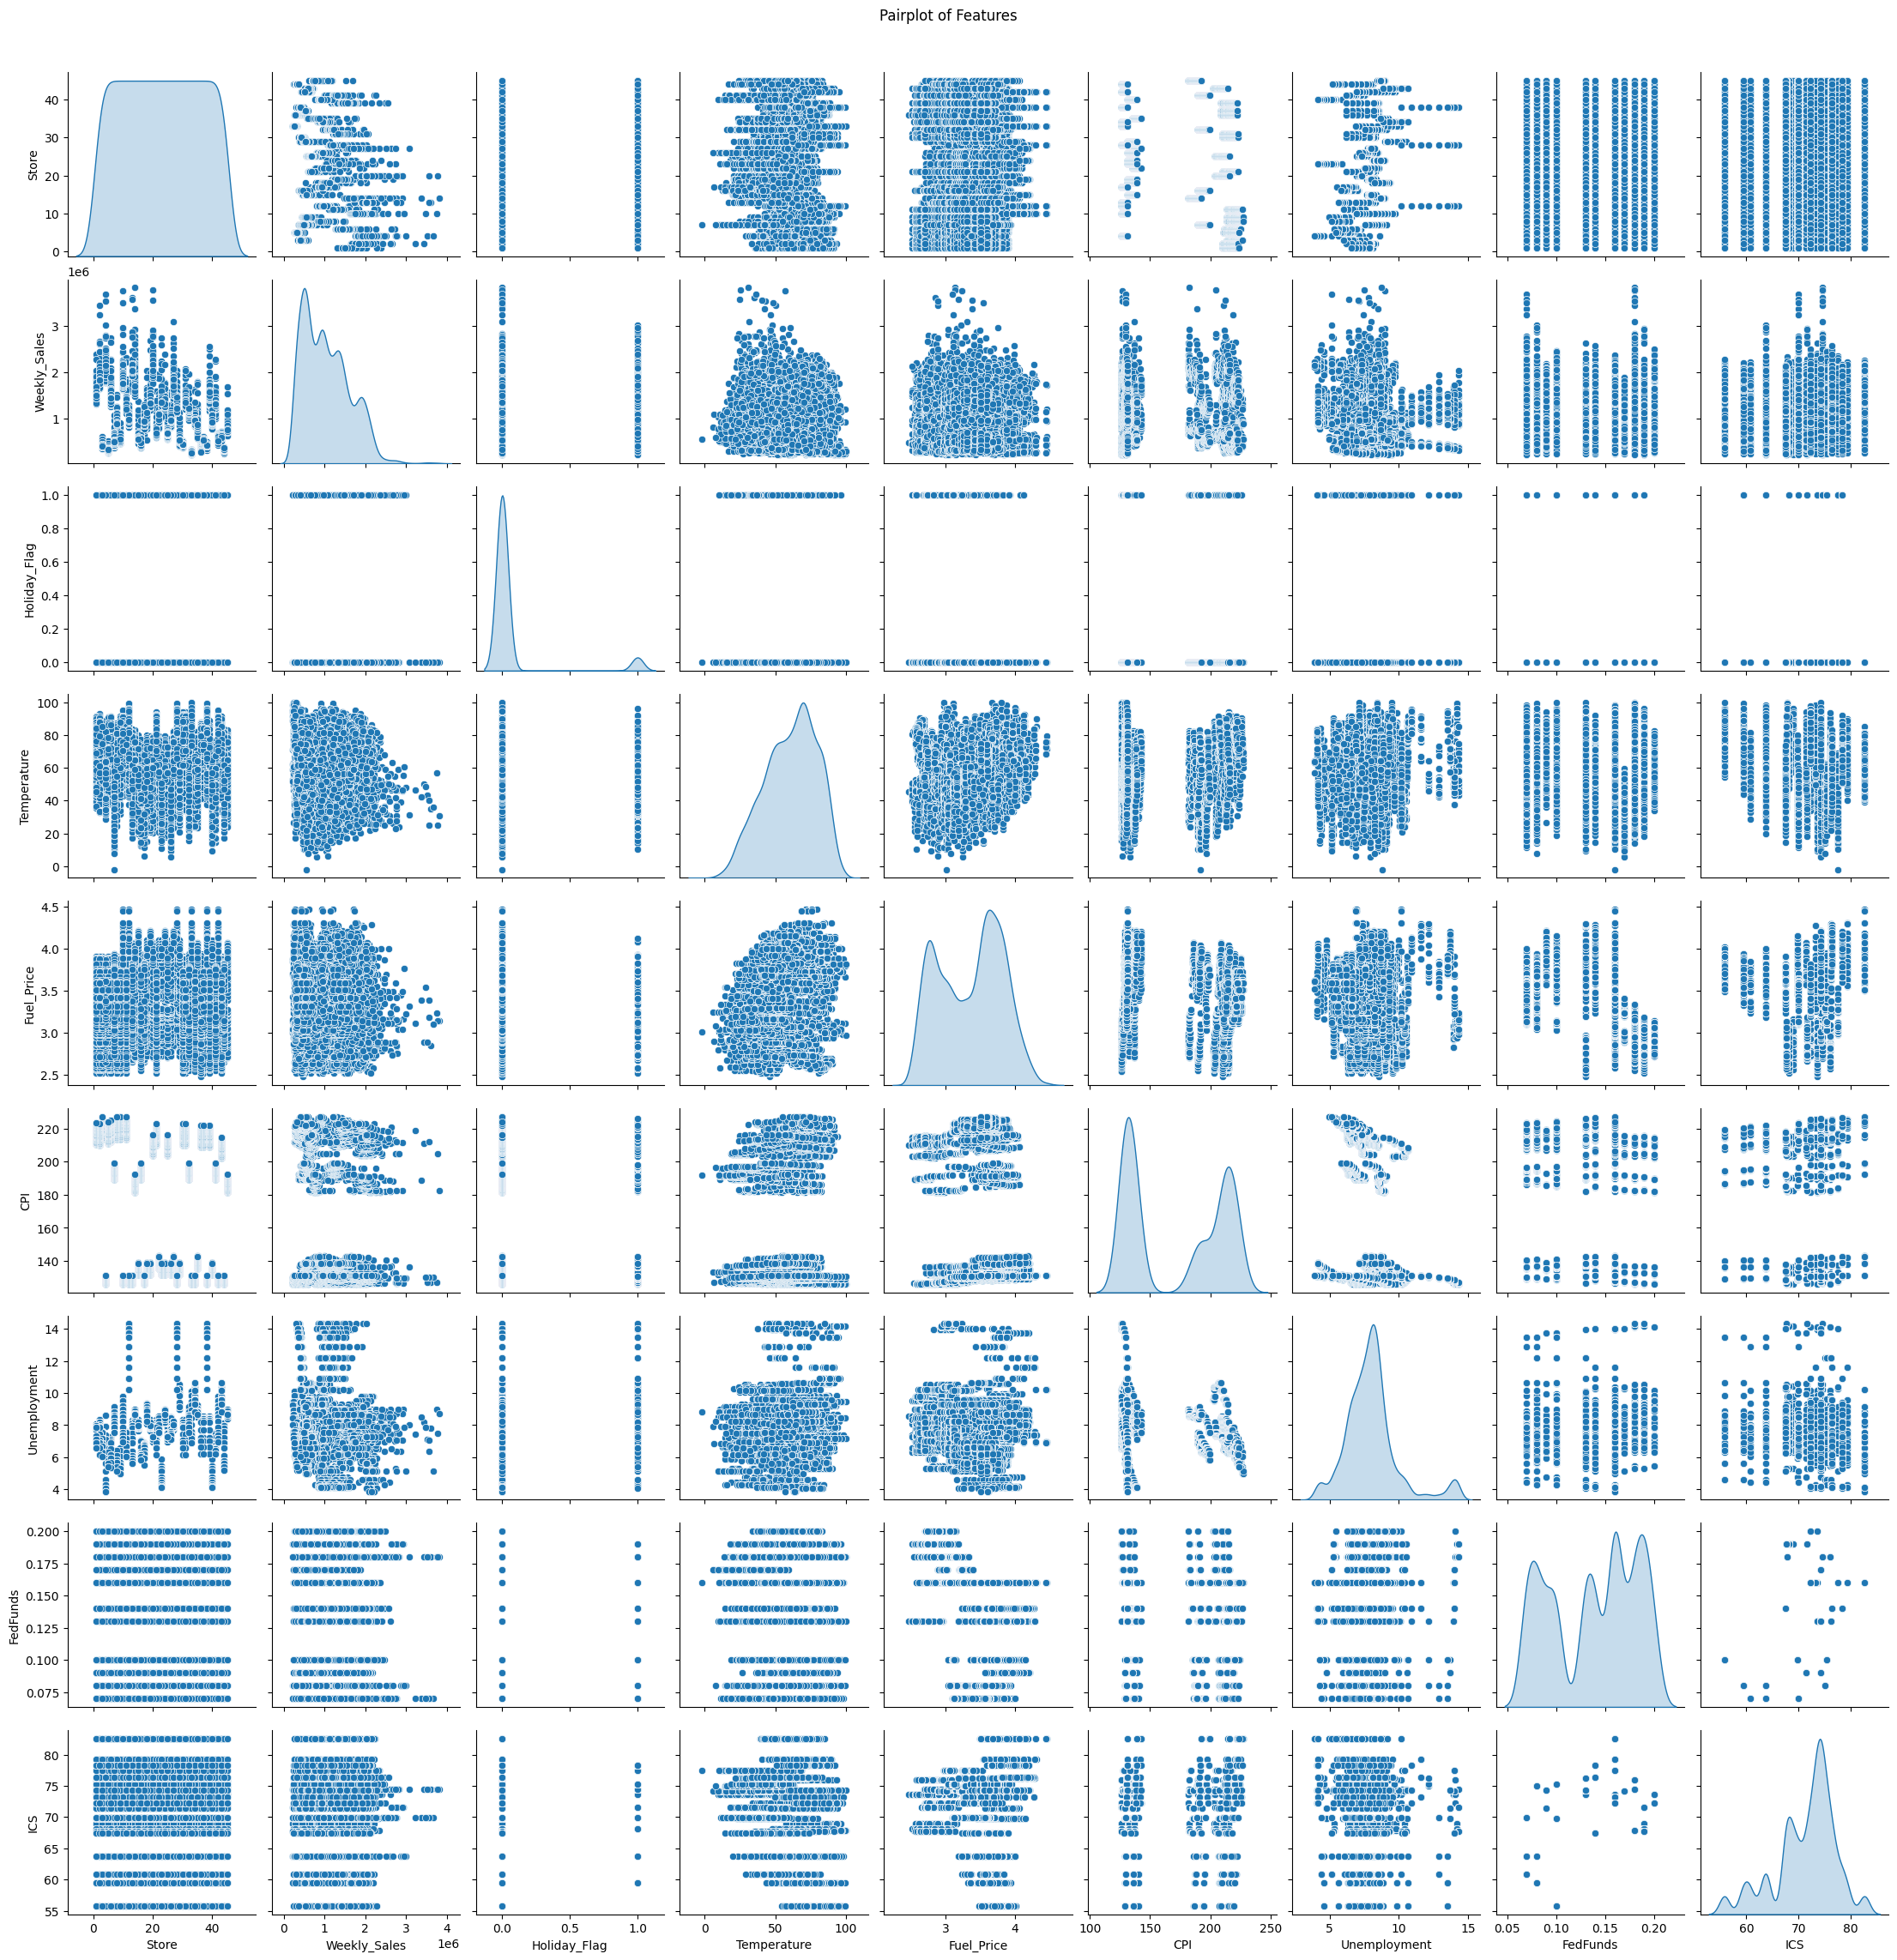

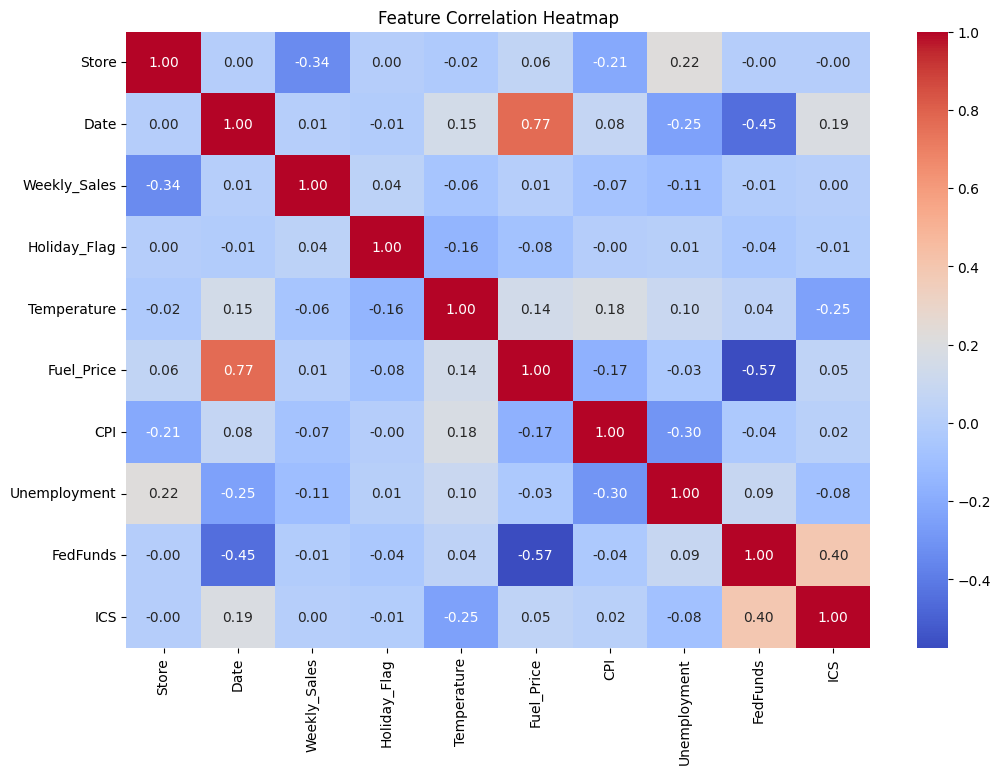

TypeError: 'DatetimeArray' with dtype datetime64[ns] does not support reduction 'var'

In [4]:
print(df.info())
print(df.describe())

# Check for missing values
print("Missing Values:\n", df.isna().sum())

# Step 2: Explore Feature Relevance
# Pairplots
sns.pairplot(df, diag_kind='kde')
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Feature Variance
feature_variance = df.var()
feature_variance.plot(kind='bar', figsize=(10, 6), title="Feature Variance")
plt.ylabel("Variance")
plt.xlabel("Features")
plt.show()

# Scatter plots of features vs response variable
for feature in ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=feature, y='Weekly_Sales')
    plt.title(f"Variance of {feature} vs Weekly_Sales")
    plt.show()

# Distribution of Numerical Features
df.hist(figsize=(12, 10), bins=30)
plt.suptitle("Feature Distributions")
plt.show()

# Boxplots for Outliers
for feature in ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=feature)
    plt.title(f"Boxplot of {feature}")
    plt.show()

# Categorical Analysis: Example for 'Holiday_Flag'
if 'Holiday_Flag' in df.columns:
    sns.barplot(data=df, x='Holiday_Flag', y='Weekly_Sales')
    plt.title("Holiday Effect on Weekly Sales")
    plt.show()